In [1]:
#Import relevant libraries
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

In [3]:
data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
#if all diagnosis are treated as binary, either has disease or not, there's no need to ressample
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [7]:
# sns.set(style='whitegrid', context='notebook')
# sns.pairplot(data_binary[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]], height=2)
# plt.title("Diagnosis Binary")
# #plt.show()
# plt.savefig("diagnosisBinary_mult.png")

In [8]:
# cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
# cm = np.corrcoef(data_binary[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal","diagnosis"]].values.T)
# sns.set(font_scale=1)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8},
#                  yticklabels=cols, xticklabels=cols)
# plt.title("Diagnosis Binary")
# #plt.show()
# plt.savefig("diagnosisBinary_corr.png")

In [9]:
data_binary_n = data_binary.values
#print(data_binary_n.shape)
number_for_train = int(np.ceil(data_binary_n.shape[0]*80/100))
#print((number_for_train))

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]

In [10]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [11]:
X_binary, mean_X, std_X = featureNormalization(X_binary)

from sklearn.model_selection import train_test_split
X_binary_train, X_binary_val, y_binary_train, y_binary_val = train_test_split(X_binary, y_binary, test_size = 0.2, random_state = 0)

#print(X_binary.shape) (297,13)
#print(y_binary_val.shape)

y_binary_train = y_binary_train.reshape(X_binary_train.shape[0],1)
y_binary_val = y_binary_val.reshape(X_binary_val.shape[0],1)

#print(y_binary_train.shape) (238, 1)
#print(y_binary_val.shape) (59, 1)

In [12]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
print("Linear kernel classification: ", classifier.score(X_binary_train,y_binary_train)) #0.8607594936708861

classifier = SVC(kernel="rbf")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
print("Gaussian kernel classification: ", classifier.score(X_binary_train,y_binary_train)) #0.9113924050632911

Linear kernel classification:  0.8607594936708861
Gaussian kernel classification:  0.9113924050632911


In [13]:
def definingParamsLinear(X, y, Xval, yval,vals):
    classifier = SVC(kernel="linear")
    classifier.fit(X,y)
    prediction = classifier.predict(Xval)
    acc = classifier.score(Xval,yval)
    best_C=1.0
    best_gamma='scale'
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="linear")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

def definingParamsGaussian(X, y, Xval, yval,vals):
    classifier = SVC(kernel="rbf")
    classifier.fit(X,y)
    prediction = classifier.predict(Xval)
    acc = classifier.score(Xval,yval)
    best_C=1.0
    best_gamma='scale'
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma, kernel="rbf")
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [14]:
vals = [0.01,0.03,0.3,1,3,10,30]
best_C_linear, best_gamma_linear = definingParamsLinear(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_binary_train, y_binary_train.ravel(), X_binary_val, y_binary_val.ravel(),vals)
print("Best C for linear: ", best_C_linear) #0.01
print("Best gamma for linear: ", best_gamma_linear) #100.0
classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
print("Linear kernel classification for the training data: ", classifier.score(X_binary_train,y_binary_train)) #0.8565400843881856

print("Best C for gaussian: ", best_C_gaussian) #0.3
print("Best gamma for gaussian: ", best_gamma_gaussian) #0.1
classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
print("Gaussian kernel classifier for the training data: ", classifier.score(X_binary_train,y_binary_train)) #0.890295358649789


Best C for linear:  1.0
Best gamma for linear:  scale
Linear kernel classification for the training data:  0.8607594936708861
Best C for gaussian:  1.0
Best gamma for gaussian:  scale
Gaussian kernel classifier for the training data:  0.9113924050632911


Accuracy linear:  0.8333333333333334
Recall linear:  0.7333333333333333
Specify linear:  0.9333333333333333
Precision linear:  0.9166666666666666
F1 linear:  0.8148148148148148


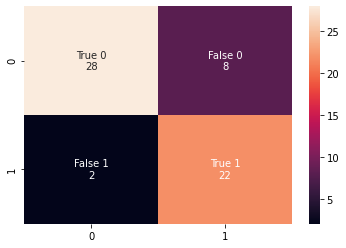

In [15]:
from sklearn.metrics import confusion_matrix
classifier = SVC(C=best_C_linear,gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_val)
cm_test_linear = confusion_matrix(prediction, y_binary_val)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_linear.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_linear, annot=labels, fmt="")

tn_linear = cm_test_linear[0][0]
fp_linear = cm_test_linear[1][0]
fn_linear = cm_test_linear[0][1]
tp_linear = cm_test_linear[1][1]

accuracy_linear = (tp_linear + tn_linear) / (tp_linear + tn_linear + fp_linear + fn_linear)
recall_linear = (tp_linear) / (tp_linear + fn_linear)
specifity_linear = (tn_linear) / (tn_linear + fp_linear)
precision_linear = (tp_linear) / (tp_linear + fp_linear)
F1_linear = 2*(recall_linear * precision_linear)/(recall_linear+precision_linear)

print("Accuracy linear: ", accuracy_linear) #0.8333333333333334
print("Recall linear: ", recall_linear) #0.7333333333333333
print("Specify linear: ", specifity_linear) #0.9333333333333333
print("Precision linear: ", precision_linear) #0.9166666666666666
print("F1 linear: ", F1_linear) #0.8148148148148148

Accuracy gaussian:  0.8333333333333334
Recall gaussian:  0.7333333333333333
Specify gaussian:  0.9333333333333333
Precision gaussian:  0.9166666666666666
F1 gaussian:  0.8148148148148148


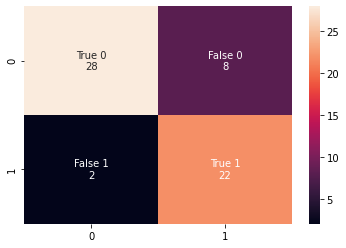

In [16]:
classifier = SVC(C=best_C_gaussian,gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_binary_train,np.ravel(y_binary_train))
prediction = classifier.predict(X_binary_val)
cm_test_gaussian = confusion_matrix(prediction, y_binary_val)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_gaussian.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_gaussian, annot=labels, fmt="")

tn_gaussian = cm_test_gaussian[0][0]
fp_gaussian = cm_test_gaussian[1][0]
fn_gaussian = cm_test_gaussian[0][1]
tp_gaussian = cm_test_gaussian[1][1]

accuracy_gaussian = (tp_gaussian + tn_gaussian) / (tp_gaussian + tn_gaussian + fp_gaussian + fn_gaussian)
recall_gaussian = (tp_gaussian) / (tp_gaussian + fn_gaussian)
specifity_gaussian = (tn_gaussian) / (tn_gaussian + fp_gaussian)
precision_gaussian = (tp_gaussian) / (tp_gaussian + fp_gaussian)
F1_gaussian = 2*(recall_gaussian * precision_gaussian)/(recall_gaussian+precision_gaussian)

print("Accuracy gaussian: ", accuracy_gaussian) #0.8333333333333334
print("Recall gaussian: ", recall_gaussian) #0.7333333333333333
print("Specify gaussian: ", specifity_gaussian) #0.9333333333333333
print("Precision gaussian: ", precision_gaussian) #0.9166666666666666
print("F1 gaussian: ", F1_gaussian) #0.8148148148148148

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

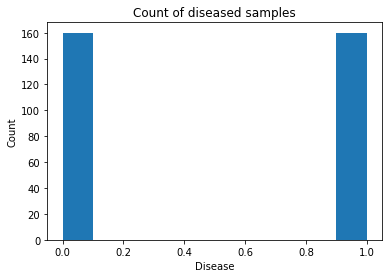

In [17]:
data_n = data_binary.values

X = data_n[:,:-1]
y = data_n[:,-1]

import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_ros)

In [18]:
X_ros, mean_X, std_X = featureNormalization(X_ros)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 0)

y_train = y_train.reshape(y_train.shape[0],1)
y_val = y_val.reshape(y_val.shape[0],1)

In [19]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
print("Linear kernel classification: ", classifier.score(X_train,y_train)) #0.875

classifier = SVC(kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
print("Gaussian kernel classification: ", classifier.score(X_train,y_train)) #0.91796875

Linear kernel classification:  0.8671875
Gaussian kernel classification:  0.8984375


In [20]:
vals = [0.01,0.03,0.3,1,3,10,30]
best_C_linear, best_gamma_linear = definingParamsLinear(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
print("Best C for linear: ", best_C_linear) #0.01
print("Best gamma for linear: ", best_gamma_linear) #100.0
classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
print("Linear kernel classification for the training data: ", classifier.score(X_train,y_train)) #0.875

print("Best C for gaussian: ", best_C_gaussian) #0.3
print("Best gamma for gaussian: ", best_gamma_gaussian) #0.1
classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
print("Gaussian kernel classifier for the training data: ", classifier.score(X_train,y_train)) #0.96484375

Best C for linear:  0.01
Best gamma for linear:  100.0
Linear kernel classification for the training data:  0.87109375
Best C for gaussian:  3
Best gamma for gaussian:  0.1
Gaussian kernel classifier for the training data:  0.96484375


Accuracy linear:  0.765625
Recall linear:  0.6944444444444444
Specify linear:  0.8571428571428571
Precision linear:  0.8620689655172413
F1 linear:  0.7692307692307692


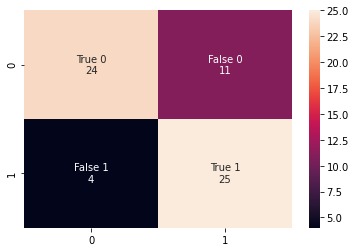

In [21]:
from sklearn.metrics import confusion_matrix
classifier = SVC(C=best_C_linear,gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
prediction = classifier.predict(X_val)
cm_test_linear = confusion_matrix(prediction, y_val)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_linear.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_linear, annot=labels, fmt="")

tn_linear = cm_test_linear[0][0]
fp_linear = cm_test_linear[1][0]
fn_linear = cm_test_linear[0][1]
tp_linear = cm_test_linear[1][1]

accuracy_linear = (tp_linear + tn_linear) / (tp_linear + tn_linear + fp_linear + fn_linear)
recall_linear = (tp_linear) / (tp_linear + fn_linear)
specifity_linear = (tn_linear) / (tn_linear + fp_linear)
precision_linear = (tp_linear) / (tp_linear + fp_linear)
F1_linear = 2*(recall_linear * precision_linear)/(recall_linear+precision_linear)

print("Accuracy linear: ", accuracy_linear) #0.78125
print("Recall linear: ", recall_linear) #0.7777777777777778
print("Specify linear: ", specifity_linear) #0.7857142857142857
print("Precision linear: ", precision_linear) #0.8235294117647058
print("F1 linear: ", F1_linear) #0.7999999999999999

Accuracy gaussian:  0.8125
Recall gaussian:  0.8055555555555556
Specify gaussian:  0.8214285714285714
Precision gaussian:  0.8529411764705882
F1 gaussian:  0.8285714285714286


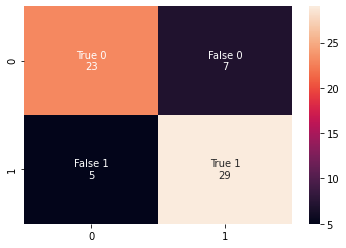

In [22]:
from sklearn.metrics import confusion_matrix
classifier = SVC(C=best_C_gaussian,gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
prediction = classifier.predict(X_val)
cm_test_gaussian = confusion_matrix(prediction, y_val)

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_gaussian.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_test_gaussian, annot=labels, fmt="")

tn_gaussian = cm_test_gaussian[0][0]
fp_gaussian = cm_test_gaussian[1][0]
fn_gaussian = cm_test_gaussian[0][1]
tp_gaussian = cm_test_gaussian[1][1]

accuracy_gaussian = (tp_gaussian + tn_gaussian) / (tp_gaussian + tn_gaussian + fp_gaussian + fn_gaussian)
recall_gaussian = (tp_gaussian) / (tp_gaussian + fn_gaussian)
specifity_gaussian = (tn_gaussian) / (tn_gaussian + fp_gaussian)
precision_gaussian = (tp_gaussian) / (tp_gaussian + fp_gaussian)
F1_gaussian = 2*(recall_gaussian * precision_gaussian)/(recall_gaussian+precision_gaussian)

print("Accuracy gaussian: ", accuracy_gaussian) #0.84375
print("Recall gaussian: ", recall_gaussian) #0.8888888888888888
print("Specify gaussian: ", specifity_gaussian) #0.7857142857142857
print("Precision gaussian: ", precision_gaussian) #0.8421052631578947
print("F1 gaussian: ", F1_gaussian) #0.8648648648648649

(array([160.,   0., 160.,   0.,   0., 160.,   0., 160.,   0., 160.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

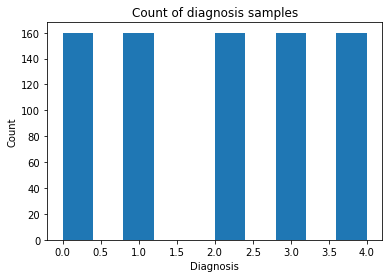

In [23]:
data_n = data.values

X = data_n[:,:-1]
y = data_n[:,-1]

import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

plt.title("Count of diagnosis samples")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.hist(y_ros)

In [24]:
X_ros, mean_X, std_X = featureNormalization(X_ros)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 0)

y_train = y_train.reshape(y_train.shape[0],1)
y_val = y_val.reshape(y_val.shape[0],1)

In [25]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
print("Linear kernel classification: ", classifier.score(X_train,y_train)) #0.5765625

classifier = SVC(kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
print("Gaussian kernel classification: ", classifier.score(X_train,y_train)) #0.88125

Linear kernel classification:  0.6265625
Gaussian kernel classification:  0.9015625


In [26]:
vals = [0.01,0.03,0.3,1,3,10,30]
best_C_linear, best_gamma_linear = definingParamsLinear(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
best_C_gaussian, best_gamma_gaussian = definingParamsGaussian(X_train, y_train.ravel(), X_val, y_val.ravel(),vals)
print("Best C for linear: ", best_C_linear) #0.01
print("Best gamma for linear: ", best_gamma_linear) #100.0
classifier = SVC(C=best_C_linear, gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
print("Linear kernel classification for the training data: ", classifier.score(X_train,y_train)) #0.5984375

print("Best C for gaussian: ", best_C_gaussian) #0.3
print("Best gamma for gaussian: ", best_gamma_gaussian) #0.1
classifier = SVC(C=best_C_gaussian, gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
print("Gaussian kernel classifier for the training data: ", classifier.score(X_train,y_train)) #1.0


Best C for linear:  10
Best gamma for linear:  100.0
Linear kernel classification for the training data:  0.6375
Best C for gaussian:  1
Best gamma for gaussian:  100.0
Gaussian kernel classifier for the training data:  1.0


Accuracy linear:  0.6125


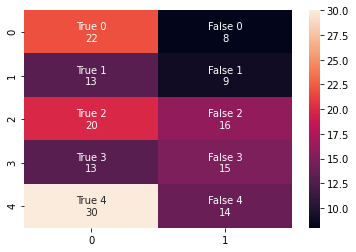

In [27]:
from sklearn.metrics import confusion_matrix
classifier = SVC(C=best_C_linear,gamma=best_gamma_linear, kernel="linear")
classifier.fit(X_train,np.ravel(y_train))
prediction = classifier.predict(X_val)
cm_test_linear = confusion_matrix(prediction, y_val)

# cnt = 0

# for i in range(len(prediction)):
#     if prediction[i] == 3:
#         if y_val[i] != 3:
#             cnt = cnt + 1
# print(cnt)

t0_linear = cm_test_linear[0][0]
f0_linear = cm_test_linear[0][1]+cm_test_linear[0][2]+cm_test_linear[0][3]+cm_test_linear[0][4]
t1_linear = cm_test_linear[1][1]
f1_linear = cm_test_linear[1][0]+cm_test_linear[1][2]+cm_test_linear[1][3]+cm_test_linear[1][4]
t2_linear = cm_test_linear[2][2]
f2_linear = cm_test_linear[2][0]+cm_test_linear[2][1]+cm_test_linear[2][3]+cm_test_linear[2][4]
t3_linear = cm_test_linear[3][3]
f3_linear = cm_test_linear[3][0]+cm_test_linear[3][1]+cm_test_linear[3][2]+cm_test_linear[3][4]
t4_linear = cm_test_linear[4][4]
f4_linear = cm_test_linear[4][0]+cm_test_linear[4][1]+cm_test_linear[4][2]+cm_test_linear[4][3]

cm_test_linear = np.array([[t0_linear, f0_linear],[t1_linear,f1_linear],[t2_linear,f2_linear],[t3_linear, f3_linear],[t4_linear, f4_linear]])

group_names = ["True 0","False 0","True 1","False 1","True 2","False 2","True 3","False 3","True 4","False 4"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_linear.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(5,2)
sns.heatmap(cm_test_linear, annot=labels, fmt="")

accuracy_linear = (t0_linear + t1_linear + t2_linear + t3_linear + t4_linear) / (t0_linear + t1_linear + t2_linear + t3_linear + t4_linear + f0_linear + f1_linear + f2_linear + f3_linear + f4_linear)

print("Accuracy linear: ", accuracy_linear) #0.55

Accuracy gaussian:  0.9875


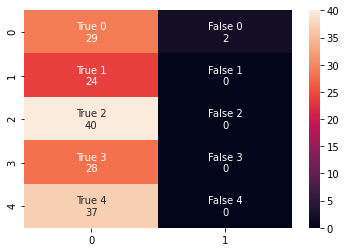

In [28]:
from sklearn.metrics import confusion_matrix
classifier = SVC(C=best_C_gaussian,gamma=best_gamma_gaussian, kernel="rbf")
classifier.fit(X_train,np.ravel(y_train))
prediction = classifier.predict(X_val)
cm_test_gaussian = confusion_matrix(prediction, y_val)

# cnt = 0

# for i in range(len(prediction)):
#     if prediction[i] == 3:
#         if y_val[i] != 3:
#             cnt = cnt + 1
# print(cnt)

t0_gaussian = cm_test_gaussian[0][0]
f0_gaussian = cm_test_gaussian[0][1]+cm_test_gaussian[0][2]+cm_test_gaussian[0][3]+cm_test_gaussian[0][4]
t1_gaussian = cm_test_gaussian[1][1]
f1_gaussian = cm_test_gaussian[1][0]+cm_test_gaussian[1][2]+cm_test_gaussian[1][3]+cm_test_gaussian[1][4]
t2_gaussian = cm_test_gaussian[2][2]
f2_gaussian = cm_test_gaussian[2][0]+cm_test_gaussian[2][1]+cm_test_gaussian[2][3]+cm_test_gaussian[2][4]
t3_gaussian = cm_test_gaussian[3][3]
f3_gaussian = cm_test_gaussian[3][0]+cm_test_gaussian[3][1]+cm_test_gaussian[3][2]+cm_test_gaussian[3][4]
t4_gaussian = cm_test_gaussian[4][4]
f4_gaussian = cm_test_gaussian[4][0]+cm_test_gaussian[4][1]+cm_test_gaussian[4][2]+cm_test_gaussian[4][3]

cm_test_gaussian = np.array([[t0_gaussian, f0_gaussian],[t1_gaussian,f1_gaussian],[t2_gaussian,f2_gaussian],[t3_gaussian, f3_gaussian],[t4_gaussian, f4_gaussian]])

group_names = ["True 0","False 0","True 1","False 1","True 2","False 2","True 3","False 3","True 4","False 4"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test_gaussian.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(5,2)
sns.heatmap(cm_test_gaussian, annot=labels, fmt="")

accuracy_gaussian = (t0_gaussian + t1_gaussian + t2_gaussian + t3_gaussian + t4_gaussian) / (t0_gaussian + t1_gaussian + t2_gaussian + t3_gaussian + t4_gaussian + f0_gaussian + f1_gaussian + f2_gaussian + f3_gaussian + f4_gaussian)

print("Accuracy gaussian: ", accuracy_gaussian) #0.975